#Giodio Mitaart

#Logistic Regression

Feature Engineering

In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
#load dataset
df = pd.read_csv("dataset.csv")

#check NaN values
print(df.isna().values.any())

#check total missing values
print(df.isnull().sum())

#remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

#fill missing values
df.fillna(0)

True
id                        0
host_id                 238
host_name                46
host_response_time      850
host_response_rate      803
                      ...  
Unnamed: 86           13044
Unnamed: 87           13044
Unnamed: 88           13044
Unnamed: 89           13044
Unnamed: 90           13048
Length: 91, dtype: int64


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (50,51,52,53,54,55,56,57,58,62,63,64,66,69,70,78,79,81,82,83,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,reviews_per_month
0,35303,151977,Miyuki,0,0,0,Shibuya District,3,3,Shibuya District,Shibuya Ku,Apartment,Private room,1,1,1,1,"$4,183.00",1,$0.00,28,1125,28,28,1125,1125,18,0,94,0.18
1,197677,964081,Yoshimi & Marek,within a few hours,100%,88%,Sumida District,1,1,Sumida District,Sumida Ku,Apartment,Entire home/apt,2,1,1,2,"$11,048.00",1,$0.00,3,365,3,3,365,365,165,11,95,1.57
2,289597,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,Nerima Ku,Apartment,Entire home/apt,2,1,1,1,"$4,171.00",1,"$1,070.00",28,180,1,30,180,180,113,7,95,1.18
3,370759,1573631,"Gilles,Mayumi,Taiki",within a day,100%,93%,Setagaya District,3,3,Setagaya District,Setagaya Ku,Apartment,Entire home/apt,2,1,0,1,"$6,952.00",1,$0.00,28,720,28,28,720,720,103,5,95,1.39
4,700253,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,Nerima Ku,Apartment,Entire home/apt,2,1,1,1,"$3,957.00",1,"$1,070.00",28,180,1,28,180,180,103,3,96,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13044,43260549,191971770,Hostel,0,0,0,0,3,3,Chiyoda District,Chiyoda Ku,Hostel,Private room,2,1.5,1,1,"$5,027.00",1,$0.00,1,365,1,3,365,365,0,0,0,0
13045,43260684,191971770,Hostel,0,0,0,0,3,3,Chiyoda District,Chiyoda Ku,Hostel,Private room,3,1.5,1,3,"$5,455.00",1,$0.00,1,365,1,3,365,365,0,0,0,0
13046,43272924,335257890,Blue,within an hour,100%,100%,0,0,0,Shinjuku District,Shinjuku Ku,Hotel,Private room,1,1,1,0,"$6,972.00",1,$0.00,28,30,28,28,1125,1125,0,0,0,0
13047,43281694,333948576,Kido,0,0,0,0,0,0,Shibuya District,Shibuya Ku,House,Entire home/apt,15,2,3,9,"$24,992.00",1,$0.00,1,90,1,1,90,90,0,0,0,0


In [6]:
#remove dollar tags to convert object to float
df['price'] = df["price"].replace('$', '')
df['extra_people'] = df["extra_people"].replace('$', '')

#convert selected features from object to float (i tried to convert from object to int but it didn't work)
#selected features based on numeric dataset
df["host_id"] = pd.to_numeric(df["host_id"], errors='coerce')
df["host_listings_count"] = pd.to_numeric(df["host_listings_count"], errors='coerce')
df["host_total_listings_count"] = pd.to_numeric(df["host_total_listings_count"], errors='coerce')
df["accommodates"] = pd.to_numeric(df["accommodates"], errors='coerce')
df["bathrooms"] = pd.to_numeric(df["bathrooms"], errors='coerce')
df["bedrooms"] = pd.to_numeric(df["bedrooms"], errors='coerce')
df["beds"] = pd.to_numeric(df["beds"], errors='coerce')
df["price"] = pd.to_numeric(df["price"], errors='coerce')
df["guests_included"] = pd.to_numeric(df["guests_included"], errors='coerce')
df["extra_people"] = pd.to_numeric(df["extra_people"], errors='coerce')
df["minimum_nights"] = pd.to_numeric(df["minimum_nights"], errors='coerce')
df["maximum_nights"] = pd.to_numeric(df["maximum_nights"], errors='coerce')
df["minimum_minimum_nights"] = pd.to_numeric(df["minimum_minimum_nights"], errors='coerce')
df["maximum_minimum_nights"] = pd.to_numeric(df["maximum_minimum_nights"], errors='coerce')
df["minimum_maximum_nights"] = pd.to_numeric(df["minimum_maximum_nights"], errors='coerce')
df["maximum_maximum_nights"] = pd.to_numeric(df["maximum_maximum_nights"], errors='coerce')
df["number_of_reviews"] = pd.to_numeric(df["number_of_reviews"], errors='coerce')
df["number_of_reviews_ltm"] = pd.to_numeric(df["number_of_reviews_ltm"], errors='coerce')
df["review_scores_rating"] = pd.to_numeric(df["review_scores_rating"], errors='coerce')
df["reviews_per_month"] = pd.to_numeric(df["reviews_per_month"], errors='coerce')


In [8]:
#data cleansing
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

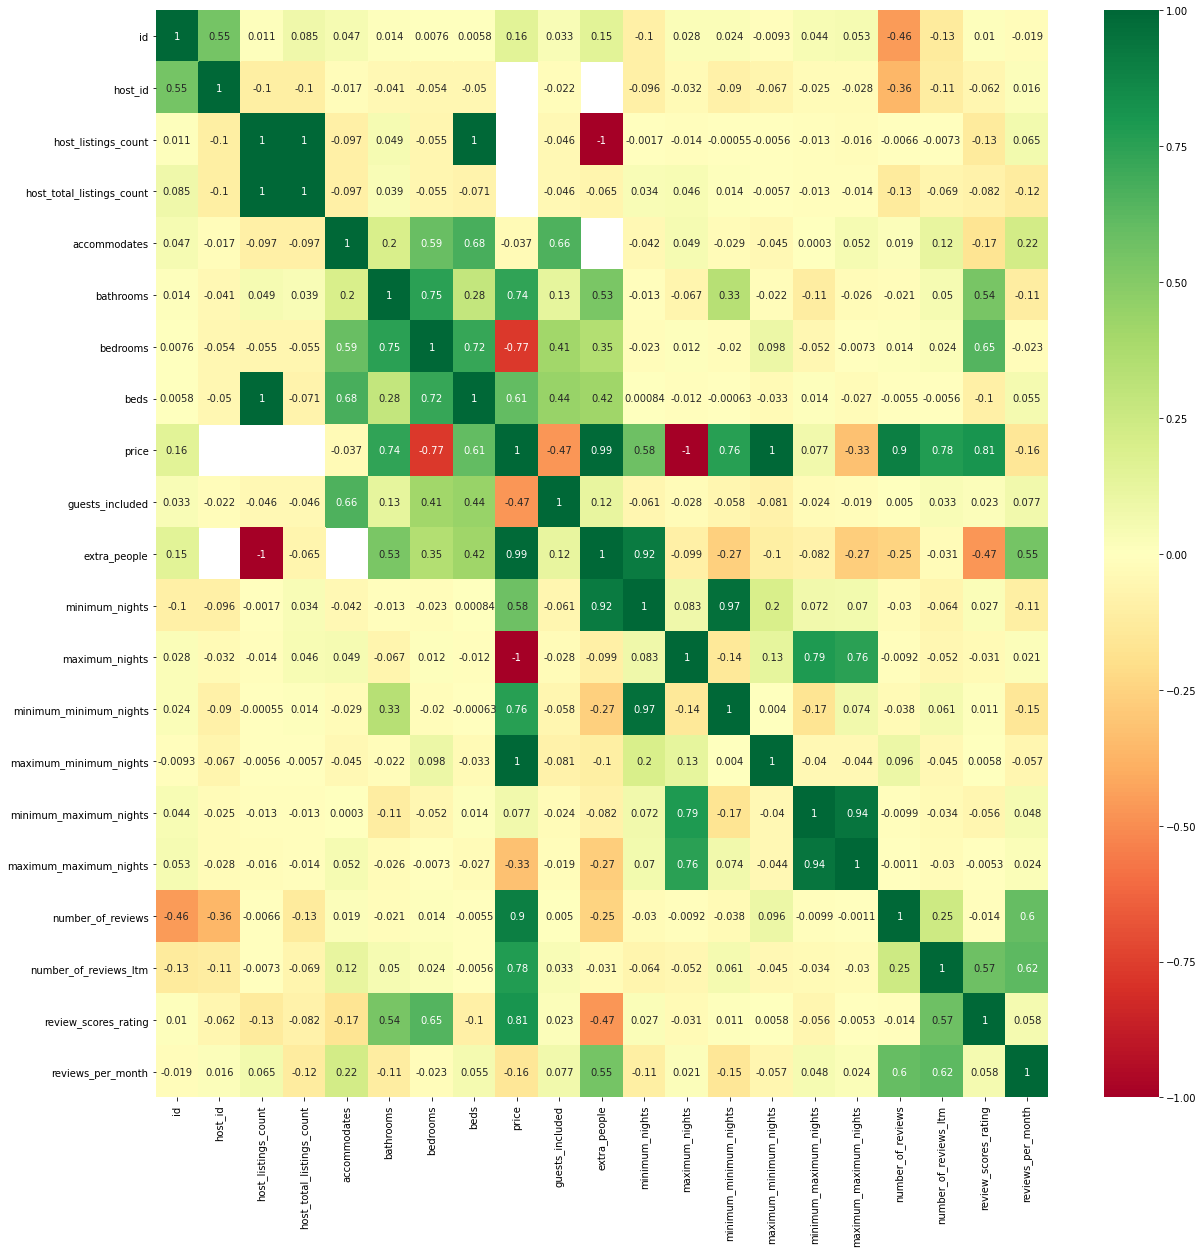

In [10]:
#find good features using correlation matrix heatmap
#the target prediction is price
X = df.iloc[:, 0:29]
y = df["price"]

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sb.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

Feature Selection

In [11]:
#feature selection
newDF = df[["accommodates", "bathrooms", "beds", "guests_included", "extra_people", "minimum_nights", "minimum_minimum_nights", "maximum_maximum_nights","number_of_reviews", "number_of_reviews_ltm", "review_scores_rating", "reviews_per_month", "price"]]

newDF = newDF.fillna(0)

#convert float to int
newDF.accommodates = newDF.accommodates.astype(int)
newDF.bathrooms = newDF.bathrooms.astype(int)
newDF.beds = newDF.beds.astype(int)
newDF.guests_included = newDF.guests_included.astype(int)
newDF.extra_people = newDF.extra_people.astype(int)
newDF.minimum_nights = newDF.minimum_nights.astype(int)
newDF.minimum_minimum_nights = newDF.minimum_minimum_nights.astype(int)
newDF.maximum_maximum_nights = newDF.maximum_maximum_nights.astype(int)
newDF.number_of_reviews = newDF.number_of_reviews.astype(int)
newDF.number_of_reviews_ltm = newDF.number_of_reviews_ltm.astype(int)
newDF.review_scores_rating = newDF.review_scores_rating.astype(int)
newDF.reviews_per_month = newDF.reviews_per_month.astype(int)
newDF.price = newDF.price.astype(int)

#check new dataset info
newDF.info()

print(newDF.round(0).astype(int))
print(newDF.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13049 entries, 0 to 13048
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   accommodates            13049 non-null  int64
 1   bathrooms               13049 non-null  int64
 2   beds                    13049 non-null  int64
 3   guests_included         13049 non-null  int64
 4   extra_people            13049 non-null  int64
 5   minimum_nights          13049 non-null  int64
 6   minimum_minimum_nights  13049 non-null  int64
 7   maximum_maximum_nights  13049 non-null  int64
 8   number_of_reviews       13049 non-null  int64
 9   number_of_reviews_ltm   13049 non-null  int64
 10  review_scores_rating    13049 non-null  int64
 11  reviews_per_month       13049 non-null  int64
 12  price                   13049 non-null  int64
dtypes: int64(13)
memory usage: 1.3 MB
       accommodates  bathrooms  ...  reviews_per_month  price
0                 1      

Prepare the training

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#prepare the training set
X = newDF
y = newDF["price"]

Training Process

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Target Prediction

In [14]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 1.00


Evaluate model

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

[[2599    0    0    0    2    1    0    0]
 [   2    1    0    0    0    0    0    0]
 [   2    0    0    0    0    0    0    0]
 [   0    0    0    0    1    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2602
           1       1.00      0.33      0.50         3
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          35       0.00      0.00      0.00         1
         139       0.00      0.00      0.00         1

    accuracy                           1.00      2610
   macro avg       0.25      0.17      0.19      2610
weighted avg       1.00      1.00      1.00      2610



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#KNN - Classification

Feature Engineering

In [31]:
#import libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [32]:
#load dataset
df = pd.read_csv("dataset.csv")

#check NaN values
print(df.isna().values.any())

#check total missing values
print(df.isnull().sum())

#remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.fillna(0)

True
id                        0
host_id                 238
host_name                46
host_response_time      850
host_response_rate      803
                      ...  
Unnamed: 86           13044
Unnamed: 87           13044
Unnamed: 88           13044
Unnamed: 89           13044
Unnamed: 90           13048
Length: 91, dtype: int64


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (50,51,52,53,54,55,56,57,58,62,63,64,66,69,70,78,79,81,82,83,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,reviews_per_month
0,35303,151977,Miyuki,0,0,0,Shibuya District,3,3,Shibuya District,Shibuya Ku,Apartment,Private room,1,1,1,1,"$4,183.00",1,$0.00,28,1125,28,28,1125,1125,18,0,94,0.18
1,197677,964081,Yoshimi & Marek,within a few hours,100%,88%,Sumida District,1,1,Sumida District,Sumida Ku,Apartment,Entire home/apt,2,1,1,2,"$11,048.00",1,$0.00,3,365,3,3,365,365,165,11,95,1.57
2,289597,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,Nerima Ku,Apartment,Entire home/apt,2,1,1,1,"$4,171.00",1,"$1,070.00",28,180,1,30,180,180,113,7,95,1.18
3,370759,1573631,"Gilles,Mayumi,Taiki",within a day,100%,93%,Setagaya District,3,3,Setagaya District,Setagaya Ku,Apartment,Entire home/apt,2,1,0,1,"$6,952.00",1,$0.00,28,720,28,28,720,720,103,5,95,1.39
4,700253,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,Nerima Ku,Apartment,Entire home/apt,2,1,1,1,"$3,957.00",1,"$1,070.00",28,180,1,28,180,180,103,3,96,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13044,43260549,191971770,Hostel,0,0,0,0,3,3,Chiyoda District,Chiyoda Ku,Hostel,Private room,2,1.5,1,1,"$5,027.00",1,$0.00,1,365,1,3,365,365,0,0,0,0
13045,43260684,191971770,Hostel,0,0,0,0,3,3,Chiyoda District,Chiyoda Ku,Hostel,Private room,3,1.5,1,3,"$5,455.00",1,$0.00,1,365,1,3,365,365,0,0,0,0
13046,43272924,335257890,Blue,within an hour,100%,100%,0,0,0,Shinjuku District,Shinjuku Ku,Hotel,Private room,1,1,1,0,"$6,972.00",1,$0.00,28,30,28,28,1125,1125,0,0,0,0
13047,43281694,333948576,Kido,0,0,0,0,0,0,Shibuya District,Shibuya Ku,House,Entire home/apt,15,2,3,9,"$24,992.00",1,$0.00,1,90,1,1,90,90,0,0,0,0


In [40]:
#data cleansing
for i in df:
    print(i, df[i].dtypes)
    if df[i].isna().values.any() and df[i].dtypes != object:
        df[i] = df[i].fillna(df[i].median())

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

#split dataset to training and testing
train, test = train_test_split(df, test_size=0.2)

id int64
host_id float64
host_name object
host_response_time object
host_response_rate object
host_acceptance_rate object
host_neighbourhood object
host_listings_count float64
host_total_listings_count float64
neighbourhood object
neighbourhood_cleansed object
property_type object
room_type object
accommodates float64
bathrooms float64
bedrooms float64
beds float64
price float64
guests_included float64
extra_people float64
minimum_nights float64
maximum_nights float64
minimum_minimum_nights float64
maximum_minimum_nights float64
minimum_maximum_nights float64
maximum_maximum_nights float64
number_of_reviews float64
number_of_reviews_ltm float64
review_scores_rating float64
reviews_per_month float64


In [35]:
#remove dollar tags to convert object to float
df['price'] = df["price"].replace('$', '')
df['extra_people'] = df["extra_people"].replace('$', '')

#convert selected features
df["host_id"] = pd.to_numeric(df["host_id"], errors='coerce')
df["host_listings_count"] = pd.to_numeric(df["host_listings_count"], errors='coerce')
df["host_total_listings_count"] = pd.to_numeric(df["host_total_listings_count"], errors='coerce')
df["accommodates"] = pd.to_numeric(df["accommodates"], errors='coerce')
df["bathrooms"] = pd.to_numeric(df["bathrooms"], errors='coerce')
df["bedrooms"] = pd.to_numeric(df["bedrooms"], errors='coerce')
df["beds"] = pd.to_numeric(df["beds"], errors='coerce')
df["price"] = pd.to_numeric(df["price"], errors='coerce')
df["guests_included"] = pd.to_numeric(df["guests_included"], errors='coerce')
df["extra_people"] = pd.to_numeric(df["extra_people"], errors='coerce')
df["minimum_nights"] = pd.to_numeric(df["minimum_nights"], errors='coerce')
df["maximum_nights"] = pd.to_numeric(df["maximum_nights"], errors='coerce')
df["minimum_minimum_nights"] = pd.to_numeric(df["minimum_minimum_nights"], errors='coerce')
df["maximum_minimum_nights"] = pd.to_numeric(df["maximum_minimum_nights"], errors='coerce')
df["minimum_maximum_nights"] = pd.to_numeric(df["minimum_maximum_nights"], errors='coerce')
df["maximum_maximum_nights"] = pd.to_numeric(df["maximum_maximum_nights"], errors='coerce')
df["number_of_reviews"] = pd.to_numeric(df["number_of_reviews"], errors='coerce')
df["number_of_reviews_ltm"] = pd.to_numeric(df["number_of_reviews_ltm"], errors='coerce')
df["review_scores_rating"] = pd.to_numeric(df["review_scores_rating"], errors='coerce')
df["reviews_per_month"] = pd.to_numeric(df["reviews_per_month"], errors='coerce')

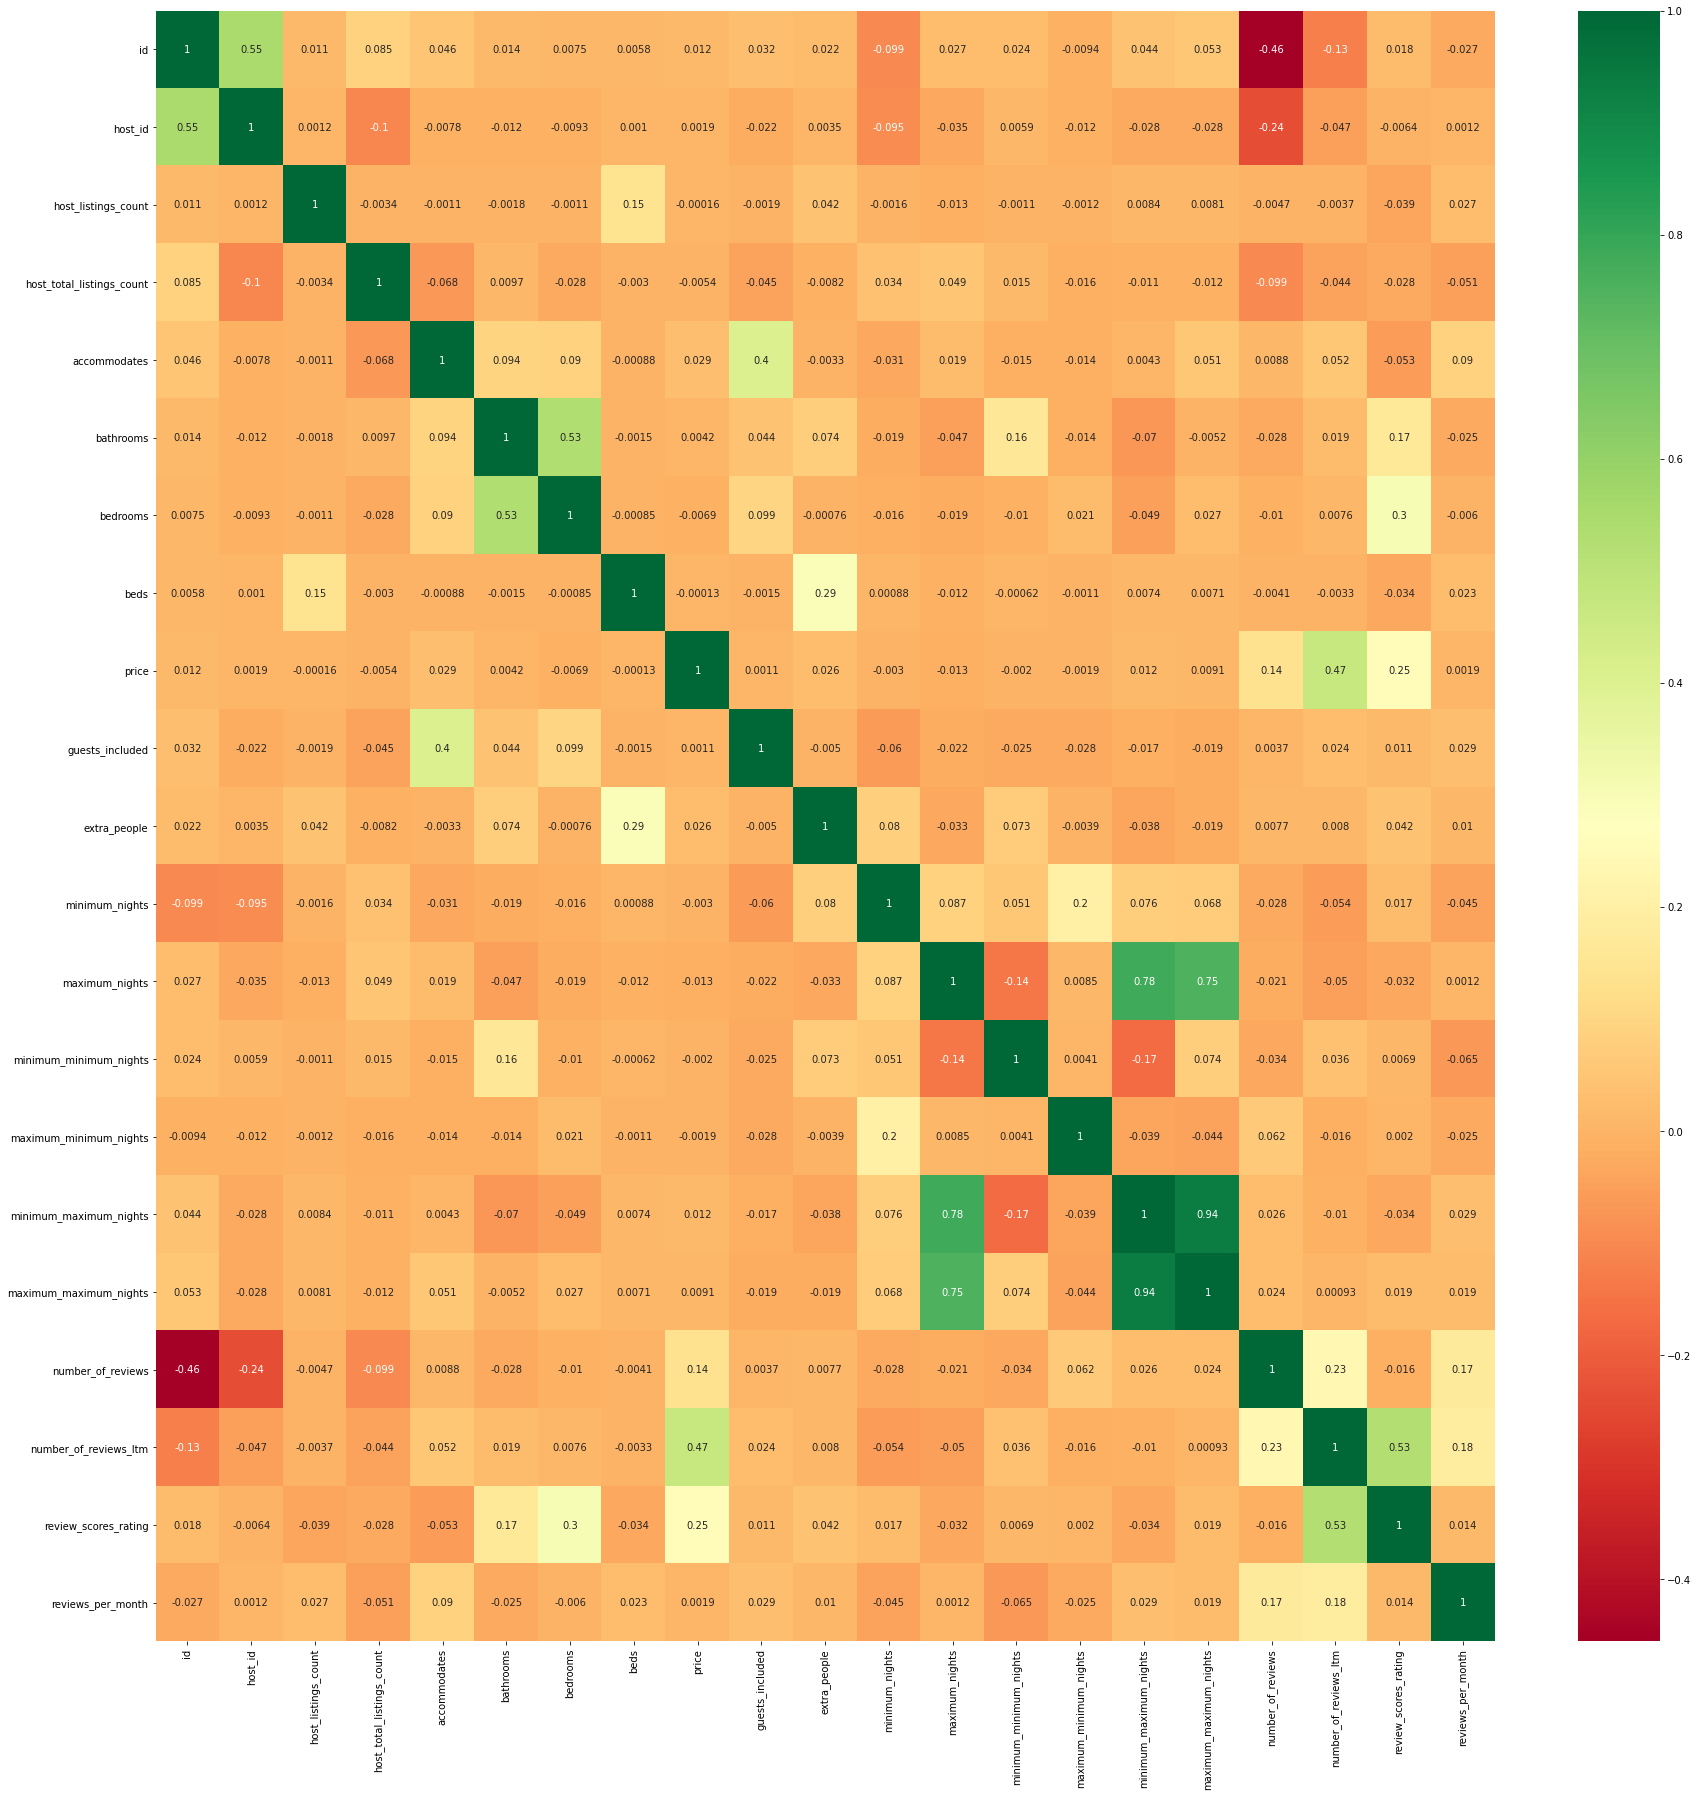

In [41]:
#find good features using correlation matrix heatmap
X = df.iloc[:, 0:29]
y = df["review_scores_rating"]

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(30,30))
g = sb.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

Feature Selection

In [42]:
#feature selection
newDF = df[["accommodates", "bathrooms", "beds", "guests_included", "extra_people", "minimum_nights", "minimum_minimum_nights", "maximum_maximum_nights","number_of_reviews", "number_of_reviews_ltm", "review_scores_rating", "reviews_per_month", "price"]]

newDF = newDF.fillna(0)

#convert float to int
newDF.accommodates = newDF.accommodates.astype(int)
newDF.bathrooms = newDF.bathrooms.astype(int)
newDF.beds = newDF.beds.astype(int)
newDF.guests_included = newDF.guests_included.astype(int)
newDF.extra_people = newDF.extra_people.astype(int)
newDF.minimum_nights = newDF.minimum_nights.astype(int)
newDF.minimum_minimum_nights = newDF.minimum_minimum_nights.astype(int)
newDF.maximum_maximum_nights = newDF.maximum_maximum_nights.astype(int)
newDF.number_of_reviews = newDF.number_of_reviews.astype(int)
newDF.number_of_reviews_ltm = newDF.number_of_reviews_ltm.astype(int)
newDF.review_scores_rating = newDF.review_scores_rating.astype(int)
newDF.reviews_per_month = newDF.reviews_per_month.astype(int)
newDF.price = newDF.price.astype(int)

newDF.info()

print(newDF.round(0).astype(int))
print(newDF.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13049 entries, 0 to 13048
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   accommodates            13049 non-null  int64
 1   bathrooms               13049 non-null  int64
 2   beds                    13049 non-null  int64
 3   guests_included         13049 non-null  int64
 4   extra_people            13049 non-null  int64
 5   minimum_nights          13049 non-null  int64
 6   minimum_minimum_nights  13049 non-null  int64
 7   maximum_maximum_nights  13049 non-null  int64
 8   number_of_reviews       13049 non-null  int64
 9   number_of_reviews_ltm   13049 non-null  int64
 10  review_scores_rating    13049 non-null  int64
 11  reviews_per_month       13049 non-null  int64
 12  price                   13049 non-null  int64
dtypes: int64(13)
memory usage: 1.3 MB
       accommodates  bathrooms  ...  reviews_per_month  price
0                 1      

Training Process

In [43]:
#training process
KNN = KNeighborsClassifier(n_neighbors = 3).fit(train[["beds", "accommodates"]], train["review_scores_rating"])

Evaluate

In [44]:
#evaluate model
classification = KNN.predict(test[["price", "number_of_reviews_ltm"]])
accuracy = accuracy_score(test["review_scores_rating"], classification)
MAE = mean_absolute_error(test["review_scores_rating"], classification)
MSE = mean_squared_error(test["review_scores_rating"], classification)

print(" ACC : %.2f" % accuracy)
print(" MAE : %.2f" % MAE)
print(" MSE : %.2f" % MSE)

 ACC : 0.20
 MAE : 5.91
 MSE : 169.49


#SVM - Classification

In [45]:
#import libraries
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, f1_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [46]:
#load data
df = pd.read_csv("dataset.csv")

#check NaN values
print(df.isna().values.any())

#check total missing values
print(df.isnull().sum())

#remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

df.fillna(0)

True
id                        0
host_id                 238
host_name                46
host_response_time      850
host_response_rate      803
                      ...  
Unnamed: 86           13044
Unnamed: 87           13044
Unnamed: 88           13044
Unnamed: 89           13044
Unnamed: 90           13048
Length: 91, dtype: int64


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (50,51,52,53,54,55,56,57,58,62,63,64,66,69,70,78,79,81,82,83,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,reviews_per_month
0,35303,151977,Miyuki,0,0,0,Shibuya District,3,3,Shibuya District,Shibuya Ku,Apartment,Private room,1,1,1,1,"$4,183.00",1,$0.00,28,1125,28,28,1125,1125,18,0,94,0.18
1,197677,964081,Yoshimi & Marek,within a few hours,100%,88%,Sumida District,1,1,Sumida District,Sumida Ku,Apartment,Entire home/apt,2,1,1,2,"$11,048.00",1,$0.00,3,365,3,3,365,365,165,11,95,1.57
2,289597,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,Nerima Ku,Apartment,Entire home/apt,2,1,1,1,"$4,171.00",1,"$1,070.00",28,180,1,30,180,180,113,7,95,1.18
3,370759,1573631,"Gilles,Mayumi,Taiki",within a day,100%,93%,Setagaya District,3,3,Setagaya District,Setagaya Ku,Apartment,Entire home/apt,2,1,0,1,"$6,952.00",1,$0.00,28,720,28,28,720,720,103,5,95,1.39
4,700253,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,Nerima Ku,Apartment,Entire home/apt,2,1,1,1,"$3,957.00",1,"$1,070.00",28,180,1,28,180,180,103,3,96,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13044,43260549,191971770,Hostel,0,0,0,0,3,3,Chiyoda District,Chiyoda Ku,Hostel,Private room,2,1.5,1,1,"$5,027.00",1,$0.00,1,365,1,3,365,365,0,0,0,0
13045,43260684,191971770,Hostel,0,0,0,0,3,3,Chiyoda District,Chiyoda Ku,Hostel,Private room,3,1.5,1,3,"$5,455.00",1,$0.00,1,365,1,3,365,365,0,0,0,0
13046,43272924,335257890,Blue,within an hour,100%,100%,0,0,0,Shinjuku District,Shinjuku Ku,Hotel,Private room,1,1,1,0,"$6,972.00",1,$0.00,28,30,28,28,1125,1125,0,0,0,0
13047,43281694,333948576,Kido,0,0,0,0,0,0,Shibuya District,Shibuya Ku,House,Entire home/apt,15,2,3,9,"$24,992.00",1,$0.00,1,90,1,1,90,90,0,0,0,0


In [47]:
#remove dollar tags to convert object to float
df['price'] = df["price"].replace('$', '')
df['extra_people'] = df["extra_people"].replace('$', '')

#convert all object columns to numeric, but this function can't be used because only some features need to be converted such as price, host_response_time and so on
# for i in df:
#     if df[i].dtypes == object:
#         df[i] = pd.to_numeric(df[i], errors='coerce')

#convert selected features
df["host_id"] = pd.to_numeric(df["host_id"], errors='coerce')
df["host_listings_count"] = pd.to_numeric(df["host_listings_count"], errors='coerce')
df["host_total_listings_count"] = pd.to_numeric(df["host_total_listings_count"], errors='coerce')
df["accommodates"] = pd.to_numeric(df["accommodates"], errors='coerce')
df["bathrooms"] = pd.to_numeric(df["bathrooms"], errors='coerce')
df["bedrooms"] = pd.to_numeric(df["bedrooms"], errors='coerce')
df["beds"] = pd.to_numeric(df["beds"], errors='coerce')
df["price"] = pd.to_numeric(df["price"], errors='coerce')
df["guests_included"] = pd.to_numeric(df["guests_included"], errors='coerce')
df["extra_people"] = pd.to_numeric(df["extra_people"], errors='coerce')
df["minimum_nights"] = pd.to_numeric(df["minimum_nights"], errors='coerce')
df["maximum_nights"] = pd.to_numeric(df["maximum_nights"], errors='coerce')
df["minimum_minimum_nights"] = pd.to_numeric(df["minimum_minimum_nights"], errors='coerce')
df["maximum_minimum_nights"] = pd.to_numeric(df["maximum_minimum_nights"], errors='coerce')
df["minimum_maximum_nights"] = pd.to_numeric(df["minimum_maximum_nights"], errors='coerce')
df["maximum_maximum_nights"] = pd.to_numeric(df["maximum_maximum_nights"], errors='coerce')
df["number_of_reviews"] = pd.to_numeric(df["number_of_reviews"], errors='coerce')
df["number_of_reviews_ltm"] = pd.to_numeric(df["number_of_reviews_ltm"], errors='coerce')
df["review_scores_rating"] = pd.to_numeric(df["review_scores_rating"], errors='coerce')
df["reviews_per_month"] = pd.to_numeric(df["reviews_per_month"], errors='coerce')


#see if all the object is numeric
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13049 entries, 0 to 13048
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13049 non-null  int64  
 1   host_id                    12711 non-null  float64
 2   host_name                  13003 non-null  object 
 3   host_response_time         12199 non-null  object 
 4   host_response_rate         12246 non-null  object 
 5   host_acceptance_rate       12729 non-null  object 
 6   host_neighbourhood         11234 non-null  object 
 7   host_listings_count        12713 non-null  float64
 8   host_total_listings_count  12913 non-null  float64
 9   neighbourhood              11861 non-null  object 
 10  neighbourhood_cleansed     13019 non-null  object 
 11  property_type              13048 non-null  object 
 12  room_type                  13045 non-null  object 
 13  accommodates               12724 non-null  flo

Training Process

In [48]:
#training process
SVM = svm.SVC().fit(train[["accommodates", "bathrooms", "beds", "guests_included", "extra_people", "minimum_nights", "minimum_minimum_nights", "maximum_maximum_nights","number_of_reviews", "number_of_reviews_ltm", "reviews_per_month", "price"]], train["review_scores_rating"])

Evaluate

In [49]:
classification = SVM.predict(test[["accommodates", "bathrooms", "beds", "guests_included", "extra_people", "minimum_nights", "minimum_minimum_nights", "maximum_maximum_nights","number_of_reviews", "number_of_reviews_ltm", "reviews_per_month", "price"]])
accuracy = accuracy_score(test["review_scores_rating"], classification)
MAE = mean_absolute_error(test["review_scores_rating"], classification)
MSE = mean_squared_error(test["review_scores_rating"], classification)
F1  = f1_score(test["review_scores_rating"], classification, average='weighted') 
# cnf_matrix = confusion_matrix(test["review_scores_rating"], classification, labels=[0,0])


print(" ACC : %.2f" % accuracy)
print(" MAE : %.2f" % MAE)
print(" MSE : %.2f" % MSE)
print(" F1  : %.2f" % F1)
print (classification_report(test["review_scores_rating"], classification))
print(cnf_matrix)

 ACC : 0.23
 MAE : 4.73
 MSE : 137.37
 F1  : 0.09
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
        13.0       0.00      0.00      0.00         1
        18.0       0.00      0.00      0.00         1
        20.0       0.00      0.00      0.00         2
        26.0       0.00      0.00      0.00         1
        30.0       0.00      0.00      0.00         1
        40.0       0.00      0.00      0.00         1
        50.0       0.00      0.00      0.00         3
        53.0       0.00      0.00      0.00         1
        60.0       0.00      0.00      0.00        16
        64.0       0.00      0.00      0.00         1
        65.0       0.00      0.00      0.00         1
        67.0       0.00      0.00      0.00         1
        68.0       0.00      0.00      0.00         2
        70.0       0.00      0.00      0.00        14
        71.0       0.00      0.00      0.00         4
        72.0       0.00      0.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: ignored

In [ ]:
#Classification Tree

In [11]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, f1_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [12]:
#load dataset
df = pd.read_csv("dataset.csv")

#check NaN values
print(df.isna().values.any())

#check total missing values
print(df.isnull().sum())

#remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

#fill missing values
df.fillna(0)

True
id                        0
host_id                 238
host_name                46
host_response_time      850
host_response_rate      803
                      ...  
Unnamed: 86           13044
Unnamed: 87           13044
Unnamed: 88           13044
Unnamed: 89           13044
Unnamed: 90           13048
Length: 91, dtype: int64


,id,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,...,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,reviews_per_month
0,35303,151977,Miyuki,0,0,0,Shibuya District,3,3,Shibuya District,...,28,1125,28,28,1125,1125,18,0,94,0.18
1,197677,964081,Yoshimi & Marek,within a few hours,100%,88%,Sumida District,1,1,Sumida District,...,3,365,3,3,365,365,165,11,95,1.57
2,289597,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,...,28,180,1,30,180,180,113,7,95,1.18
3,370759,1573631,"Gilles,Mayumi,Taiki",within a day,100%,93%,Setagaya District,3,3,Setagaya District,...,28,720,28,28,720,720,103,5,95,1.39
4,700253,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,...,28,180,1,28,180,180,103,3,96,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13044,43260549,191971770,Hostel,0,0,0,0,3,3,Chiyoda District,...,1,365,1,3,365,365,0,0,0,0
13045,43260684,191971770,Hostel,0,0,0,0,3,3,Chiyoda District,...,1,365,1,3,365,365,0,0,0,0
13046,43272924,335257890,Blue,within an hour,100%,100%,0,0,0,Shinjuku District,...,28,30,28,28,1125,1125,0,0,0,0
13047,43281694,333948576,Kido,0,0,0,0,0,0,Shibuya District,...,1,90,1,1,90,90,0,0,0,0


In [13]:
#remove dollar tags to convert object to float
df['price'] = df["price"].replace('$', '')
df['extra_people'] = df["extra_people"].replace('$', '')

#convert selected features from object to float (i tried to convert from object to int but it didn't work)
#selected features based on numeric dataset
df["host_id"] = pd.to_numeric(df["host_id"], errors='coerce')
df["host_listings_count"] = pd.to_numeric(df["host_listings_count"], errors='coerce')
df["host_total_listings_count"] = pd.to_numeric(df["host_total_listings_count"], errors='coerce')
df["accommodates"] = pd.to_numeric(df["accommodates"], errors='coerce')
df["bathrooms"] = pd.to_numeric(df["bathrooms"], errors='coerce')
df["bedrooms"] = pd.to_numeric(df["bedrooms"], errors='coerce')
df["beds"] = pd.to_numeric(df["beds"], errors='coerce')
df["price"] = pd.to_numeric(df["price"], errors='coerce')
df["guests_included"] = pd.to_numeric(df["guests_included"], errors='coerce')
df["extra_people"] = pd.to_numeric(df["extra_people"], errors='coerce')
df["minimum_nights"] = pd.to_numeric(df["minimum_nights"], errors='coerce')
df["maximum_nights"] = pd.to_numeric(df["maximum_nights"], errors='coerce')
df["minimum_minimum_nights"] = pd.to_numeric(df["minimum_minimum_nights"], errors='coerce')
df["maximum_minimum_nights"] = pd.to_numeric(df["maximum_minimum_nights"], errors='coerce')
df["minimum_maximum_nights"] = pd.to_numeric(df["minimum_maximum_nights"], errors='coerce')
df["maximum_maximum_nights"] = pd.to_numeric(df["maximum_maximum_nights"], errors='coerce')
df["number_of_reviews"] = pd.to_numeric(df["number_of_reviews"], errors='coerce')
df["number_of_reviews_ltm"] = pd.to_numeric(df["number_of_reviews_ltm"], errors='coerce')
df["review_scores_rating"] = pd.to_numeric(df["review_scores_rating"], errors='coerce')
df["reviews_per_month"] = pd.to_numeric(df["reviews_per_month"], errors='coerce')


In [27]:
#data cleansing
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

#split dataset to training and testing
# train, test = train_test_split(df, test_size=0.2)

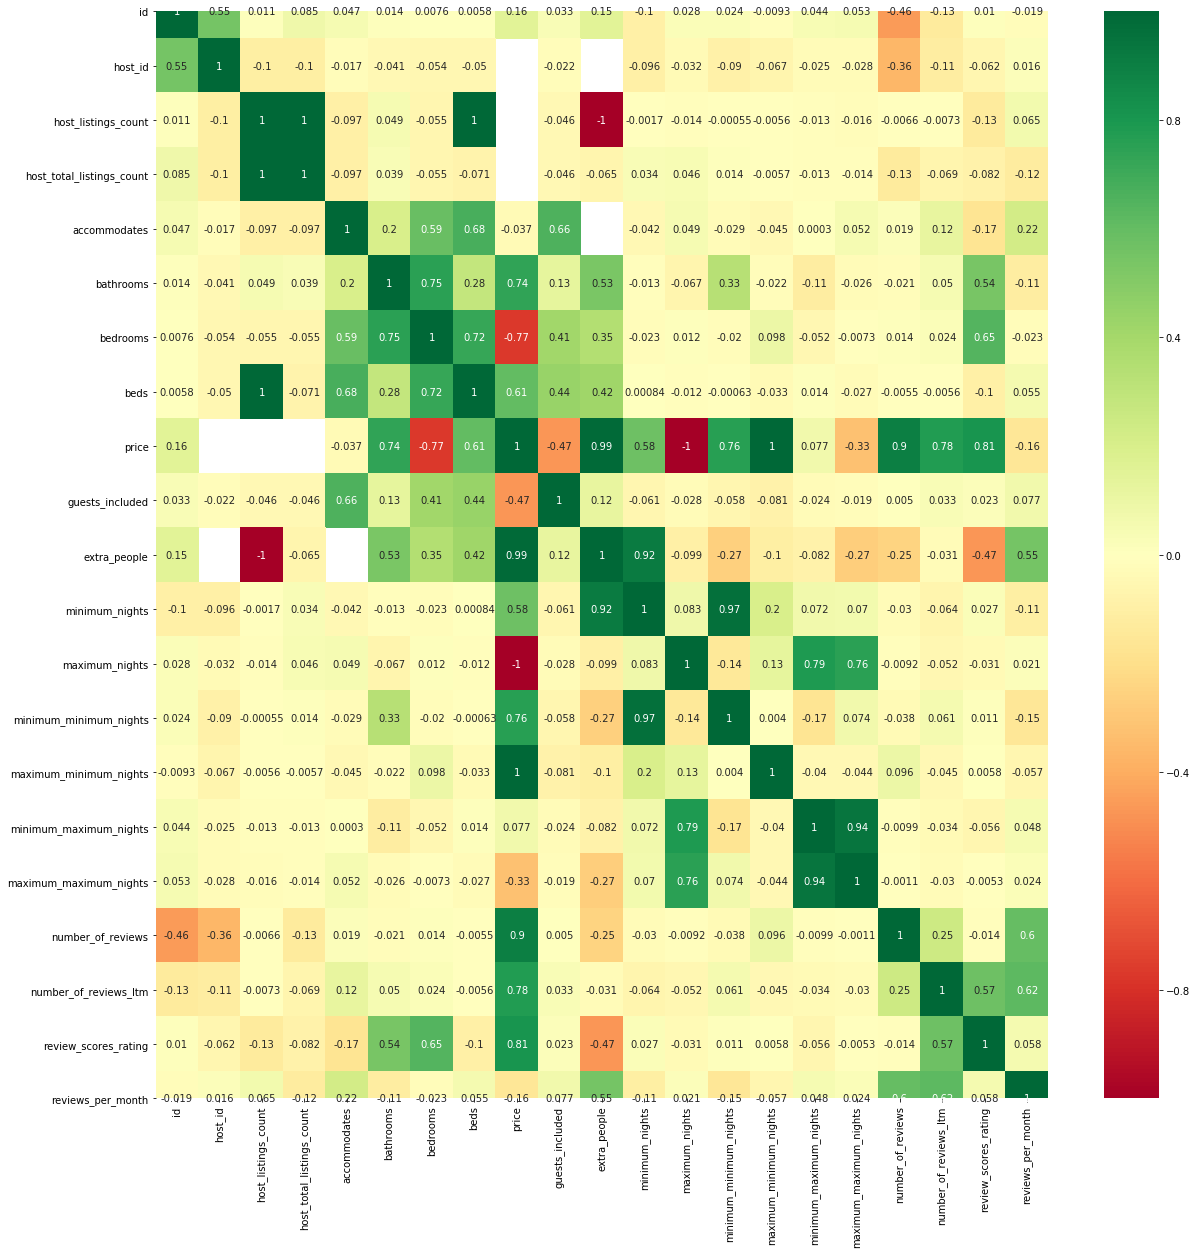

In [28]:
#find good features using correlation matrix heatmap
#the target prediction is price
X = df.iloc[:, 0:29]
y = df["price"]

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sb.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [29]:
#feature selection
newDF = df[["accommodates", "bathrooms", "beds", "guests_included", "extra_people", "minimum_nights", "minimum_minimum_nights", "maximum_maximum_nights","number_of_reviews", "number_of_reviews_ltm", "review_scores_rating", "reviews_per_month", "price"]]

newDF = newDF.fillna(0)

#convert float to int
newDF.accommodates = newDF.accommodates.astype(int)
newDF.bathrooms = newDF.bathrooms.astype(int)
newDF.beds = newDF.beds.astype(int)
newDF.guests_included = newDF.guests_included.astype(int)
newDF.extra_people = newDF.extra_people.astype(int)
newDF.minimum_nights = newDF.minimum_nights.astype(int)
newDF.minimum_minimum_nights = newDF.minimum_minimum_nights.astype(int)
newDF.maximum_maximum_nights = newDF.maximum_maximum_nights.astype(int)
newDF.number_of_reviews = newDF.number_of_reviews.astype(int)
newDF.number_of_reviews_ltm = newDF.number_of_reviews_ltm.astype(int)
newDF.review_scores_rating = newDF.review_scores_rating.astype(int)
newDF.reviews_per_month = newDF.reviews_per_month.astype(int)
newDF.price = newDF.price.astype(int)

newDF.info() 

print(newDF.round(0).astype(int))
print(newDF.head(5))

train, test = train_test_split(newDF, test_size=0.2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13049 entries, 0 to 13048
Data columns (total 13 columns):
accommodates              13049 non-null int64
bathrooms                 13049 non-null int64
beds                      13049 non-null int64
guests_included           13049 non-null int64
extra_people              13049 non-null int64
minimum_nights            13049 non-null int64
minimum_minimum_nights    13049 non-null int64
maximum_maximum_nights    13049 non-null int64
number_of_reviews         13049 non-null int64
number_of_reviews_ltm     13049 non-null int64
review_scores_rating      13049 non-null int64
reviews_per_month         13049 non-null int64
price                     13049 non-null int64
dtypes: int64(13)
memory usage: 1.3 MB
       accommodates  bathrooms  beds  guests_included  extra_people  \
0                 1          1     1                1             0   
1                 2          1     2                1             0   
2                 2         

In [31]:
#training process
DST = DecisionTreeClassifier(criterion="gini", max_depth=10).fit(train[["accommodates", "bathrooms", "beds", "guests_included", "extra_people", "minimum_nights", "minimum_minimum_nights", "maximum_maximum_nights","number_of_reviews", "number_of_reviews_ltm", "reviews_per_month", "price"]], train["review_scores_rating"])

In [33]:
classification = DST.predict(test[["accommodates", "bathrooms", "beds", "guests_included", "extra_people", "minimum_nights", "minimum_minimum_nights", "maximum_maximum_nights","number_of_reviews", "number_of_reviews_ltm", "reviews_per_month", "price"]])
accuracy = accuracy_score(test["review_scores_rating"], classification)
MAE = mean_absolute_error(test["review_scores_rating"], classification)
MSE = mean_squared_error(test["review_scores_rating"], classification)
F1  = f1_score(test["review_scores_rating"], classification, average='weighted') 
# cnf_matrix = confusion_matrix(test["review_scores_rating"], classification, labels=[0,1])


print(" ACC : %.2f" % accuracy)
print(" MAE : %.2f" % MAE)
print(" MSE : %.2f" % MSE)
print(" F1  : %.2f" % F1)
print (classification_report(test["review_scores_rating"], classification))
print(cnf_matrix)

ACC : 0.33
 MAE : 5.43
 MSE : 209.41
 F1  : 0.29


NameError: name 'classification_report' is not defined

In [ ]:
#GaussianMixture

In [1]:
#import libraries
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
#load dataset
df = pd.read_csv("dataset.csv")

#check NaN values
print(df.isna().values.any())

#check total missing values
print(df.isnull().sum())

#remove unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

#fill missing values
df.fillna(0)

True
id                        0
host_id                 238
host_name                46
host_response_time      850
host_response_rate      803
                      ...  
Unnamed: 86           13044
Unnamed: 87           13044
Unnamed: 88           13044
Unnamed: 89           13044
Unnamed: 90           13048
Length: 91, dtype: int64


,id,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,...,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,reviews_per_month
0,35303,151977,Miyuki,0,0,0,Shibuya District,3,3,Shibuya District,...,28,1125,28,28,1125,1125,18,0,94,0.18
1,197677,964081,Yoshimi & Marek,within a few hours,100%,88%,Sumida District,1,1,Sumida District,...,3,365,3,3,365,365,165,11,95,1.57
2,289597,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,...,28,180,1,30,180,180,113,7,95,1.18
3,370759,1573631,"Gilles,Mayumi,Taiki",within a day,100%,93%,Setagaya District,3,3,Setagaya District,...,28,720,28,28,720,720,103,5,95,1.39
4,700253,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,...,28,180,1,28,180,180,103,3,96,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13044,43260549,191971770,Hostel,0,0,0,0,3,3,Chiyoda District,...,1,365,1,3,365,365,0,0,0,0
13045,43260684,191971770,Hostel,0,0,0,0,3,3,Chiyoda District,...,1,365,1,3,365,365,0,0,0,0
13046,43272924,335257890,Blue,within an hour,100%,100%,0,0,0,Shinjuku District,...,28,30,28,28,1125,1125,0,0,0,0
13047,43281694,333948576,Kido,0,0,0,0,0,0,Shibuya District,...,1,90,1,1,90,90,0,0,0,0


In [3]:
#remove dollar tags to convert object to float
df['price'] = df["price"].replace('$', '')
df['extra_people'] = df["extra_people"].replace('$', '')

#convert selected features from object to float (i tried to convert from object to int but it didn't work)
#selected features based on numeric dataset
df["host_id"] = pd.to_numeric(df["host_id"], errors='coerce')
df["host_listings_count"] = pd.to_numeric(df["host_listings_count"], errors='coerce')
df["host_total_listings_count"] = pd.to_numeric(df["host_total_listings_count"], errors='coerce')
df["accommodates"] = pd.to_numeric(df["accommodates"], errors='coerce')
df["bathrooms"] = pd.to_numeric(df["bathrooms"], errors='coerce')
df["bedrooms"] = pd.to_numeric(df["bedrooms"], errors='coerce')
df["beds"] = pd.to_numeric(df["beds"], errors='coerce')
df["price"] = pd.to_numeric(df["price"], errors='coerce')
df["guests_included"] = pd.to_numeric(df["guests_included"], errors='coerce')
df["extra_people"] = pd.to_numeric(df["extra_people"], errors='coerce')
df["minimum_nights"] = pd.to_numeric(df["minimum_nights"], errors='coerce')
df["maximum_nights"] = pd.to_numeric(df["maximum_nights"], errors='coerce')
df["minimum_minimum_nights"] = pd.to_numeric(df["minimum_minimum_nights"], errors='coerce')
df["maximum_minimum_nights"] = pd.to_numeric(df["maximum_minimum_nights"], errors='coerce')
df["minimum_maximum_nights"] = pd.to_numeric(df["minimum_maximum_nights"], errors='coerce')
df["maximum_maximum_nights"] = pd.to_numeric(df["maximum_maximum_nights"], errors='coerce')
df["number_of_reviews"] = pd.to_numeric(df["number_of_reviews"], errors='coerce')
df["number_of_reviews_ltm"] = pd.to_numeric(df["number_of_reviews_ltm"], errors='coerce')
df["review_scores_rating"] = pd.to_numeric(df["review_scores_rating"], errors='coerce')
df["reviews_per_month"] = pd.to_numeric(df["reviews_per_month"], errors='coerce')


In [4]:
#data cleansing
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

#split dataset to training and testing
# train, test = train_test_split(df, test_size=0.2)

In [5]:
#feature selection
newDF = df[["accommodates", "bathrooms", "beds", "guests_included", "extra_people", "minimum_nights", "minimum_minimum_nights", "maximum_maximum_nights","number_of_reviews", "number_of_reviews_ltm", "review_scores_rating", "reviews_per_month", "price"]]

newDF = newDF.fillna(0)

#convert float to int
newDF.accommodates = newDF.accommodates.astype(int)
newDF.bathrooms = newDF.bathrooms.astype(int)
newDF.beds = newDF.beds.astype(int)
newDF.guests_included = newDF.guests_included.astype(int)
newDF.extra_people = newDF.extra_people.astype(int)
newDF.minimum_nights = newDF.minimum_nights.astype(int)
newDF.minimum_minimum_nights = newDF.minimum_minimum_nights.astype(int)
newDF.maximum_maximum_nights = newDF.maximum_maximum_nights.astype(int)
newDF.number_of_reviews = newDF.number_of_reviews.astype(int)
newDF.number_of_reviews_ltm = newDF.number_of_reviews_ltm.astype(int)
newDF.review_scores_rating = newDF.review_scores_rating.astype(int)
newDF.reviews_per_month = newDF.reviews_per_month.astype(int)
newDF.price = newDF.price.astype(int)

newDF.info() 

print(newDF.round(0).astype(int))
print(newDF.head(5))

train, test = train_test_split(newDF, test_size=0.2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13049 entries, 0 to 13048
Data columns (total 13 columns):
accommodates              13049 non-null int64
bathrooms                 13049 non-null int64
beds                      13049 non-null int64
guests_included           13049 non-null int64
extra_people              13049 non-null int64
minimum_nights            13049 non-null int64
minimum_minimum_nights    13049 non-null int64
maximum_maximum_nights    13049 non-null int64
number_of_reviews         13049 non-null int64
number_of_reviews_ltm     13049 non-null int64
review_scores_rating      13049 non-null int64
reviews_per_month         13049 non-null int64
price                     13049 non-null int64
dtypes: int64(13)
memory usage: 1.3 MB
       accommodates  bathrooms  beds  guests_included  extra_people  \
0                 1          1     1                1             0   
1                 2          1     2                1             0   
2                 2         

NameError: name 'train_test_split' is not defined

In [6]:
#prepare data
X = newDF[["accommodates", "bathrooms", "beds", "guests_included", "extra_people", "minimum_nights", "minimum_minimum_nights", "maximum_maximum_nights","number_of_reviews", "number_of_reviews_ltm", "review_scores_rating", "reviews_per_month", "price"]]

In [7]:
KMN = KMeans(n_clusters=11).fit(X)
KMNLabels = KMN.labels_
KMNClusterCenters = KMN.cluster_centers_
Ypred = KMN.predict(X)

print("KMN Labels : ", KMNLabels)
print("KMN Cluster Centre : ", KMNClusterCenters)
print("Y Predict : ", Ypred)

KMN Labels :  [0 3 6 ... 5 2 5]
KMN Cluster Centre :  [[ 4.68803794e+00  1.21816266e+00  2.77814860e+00  2.34832250e+00
  -3.67761377e-16  4.13630775e+00  3.86070613e+00  1.12386422e+03
   2.27272089e+01  1.28550852e+01  9.26574741e+01  1.13701036e+00
   3.51308625e-04]
 [ 0.00000000e+00  0.00000000e+00  1.16001300e+06  0.00000000e+00
   1.60000000e+01  4.00000000e+00  8.00000000e+00  0.00000000e+00
   1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+01
   0.00000000e+00]
 [ 4.07084934e+00  1.71318822e+00  3.11651729e+00  2.15749040e+00
   3.62782757e-02  2.60691421e+00  2.84421682e+00  6.36658131e+01
   1.93273581e+01  1.07883056e+01  7.95326504e+01  1.01152369e+00
   2.68886044e-02]
 [ 4.29370899e+00  1.24469317e+00  2.63681976e+00  2.66923968e+00
   8.04911693e-16  2.89849479e+00  2.74141258e+00  3.66058279e+02
   1.99023543e+01  1.10741027e+01  7.67977615e+01  9.45194905e-01
   3.85951370e-03]
 [-5.32907052e-15  5.00000000e+00  1.27906977e+00 -5.32907052e-15
   2.1472868

In [ ]:
#Choosing the right number of K  with Elbow Curve
Ks = range(1, 20)
KMNs = [KMeans(n_clusters=i) for i in Ks]
score = [KMNs[i].fit(X).score(X) for i in range(len(KMNs))]
plt.plot(Ks, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
#plot groups based on the features

plt.subplot(221)
sb.swarmplot(KMNLabels , X["accommodates"])
plt.subplot(222)
sb.swarmplot(KMNLabels , X["bathrooms"])
plt.subplot(223)
sb.swarmplot(KMNLabels , X["beds"])
plt.subplot(224)
sb.swarmplot(KMNLabels , X["guests_included"])

plt.subplot(231)
sb.swarmplot(KMNLabels , X["extra_people"])
plt.subplot(232)
sb.swarmplot(KMNLabels , X["minimum_nights"])
plt.subplot(233)
sb.swarmplot(KMNLabels , X["minimum_minimum_nights"])
plt.subplot(234)
sb.swarmplot(KMNLabels , X["maximum_maximum_nights"])

# plt.subplot(224)
# sb.swarmplot(KMNLabels , X["guests_included"])
# plt.subplot(224)
# sb.swarmplot(KMNLabels , X["guests_included"])
# plt.subplot(224)
# sb.swarmplot(KMNLabels , X["guests_included"])
# plt.subplot(224)
# sb.swarmplot(KMNLabels , X["guests_included"])
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [ ]:
#visualize KMeans

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c = Ypred)
plt.scatter(KMNClusterCenters[:, 0], KMNClusterCenters[:, 1], c = "b", s=200, alpha=0.5);
plt.show()
print("KMeans: ", silhouette_score(X, Ypred))

In [ ]:
#training with DBSCAN
DBS = DBSCAN().fit(X)
YPredict = DBS.fit_predict(X)
DBSLabels = DBS.labels_
DBSCore = DBS.core_sample_indices_
print("DBS Labels : ", DBSLabels)
print("DBS Core Sample : ", DBSCore)
print("Y Predict : ", Ypred)

In [ ]:
GMM = GaussianMixture(n_components=11).fit(X)
YPredict = GMM.predict(X)
print("Y Predict : ", Ypred)

plt.scatter(X.iloc[:,0], X.iloc[:,1],c = Ypred)
plt.show()
print("GMM: ", silhouette_score(X, Ypred))